# Correlation matrix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Markdown as Markdown, display

data = pd.read_csv("wijkbuurtkaart_data.csv") 

# Data preporation
Let's remove `Westpoort` district because we almost doesn't have any info about it and then remove columns that I'm sure I don't need

In [2]:
#data['stadsdeel'].unique()
data = data[data['stadsdeel']!= "Westpoort"]#.isin(['Nieuw-West', 'West', 'Zuid', 'Oost'])
print(data.shape)
data.head()

(471, 99)


,buurtcode,buurtnaam,wijkcode,gemeentecode,gemeentenaam,indelingswijziging_wijken_en_buurten,water,meest_voorkomende_postcode,dekkingspercentage,omgevingsadressendichtheid,...,eenpersoonshuishoudens,huishoudens_zonder_kinderen,huishoudens_met_kinderen,westerse_migratieachtergrond,niet_westerse_migratieachtergrond,uit_marokko,uit_nederlandse_antillen_en_aruba,uit_suriname,uit_turkije,overige_nietwestersemigratieachtergrond
0,BU03630000,Kop Zeedijk,0,GM0363,Amsterdam,1,NEE,1012,1,6776,...,515,200,46,390,211,0,11,33,11,144
1,BU03630001,Oude Kerk e.o.,0,GM0363,Amsterdam,1,NEE,1012,1,7430,...,351,127,30,243,118,6,6,13,6,83
2,BU03630002,Burgwallen Oost,0,GM0363,Amsterdam,1,NEE,1012,1,7559,...,755,286,103,561,346,16,16,49,16,247
3,BU03630003,Nes e.o.,0,GM0363,Amsterdam,1,NEE,1012,1,9947,...,149,71,24,140,40,3,0,3,7,29
4,BU03630004,BG-terrein e.o.,0,GM0363,Amsterdam,1,NEE,1012,1,8489,...,372,91,40,194,104,6,6,13,6,69


In [3]:
columns_to_drop = ['bevolkingsdichtheid_inwoners_per_km2',
                   'buurtcode',
 'buurtnaam',
 'wijkcode',
 'gemeentecode',
 'gemeentenaam',
 'indelingswijziging_wijken_en_buurten',
 'water',
 'meest_voorkomende_postcode',
 'dekkingspercentage',
 'omgevingsadressendichtheid',
 'stedelijkheid_adressen_per_km2',
                   'oppervlakte_totaal_in_ha',
 'oppervlakte_land_in_ha',
 'oppervlakte_water_in_ha',
                  'jrstatcode',
 'jaar',
 'wijknaam']
data = data.drop(columns_to_drop, axis=1)
data = data.drop([ column for column in data.columns if "_binnen_" in column ], axis=1)
#data = data.drop('kunstijsbaan_gemiddelde_afstand_in_km', axis=1)
#data = data.drop([ column for column in data.columns if "_uit_" in column ], axis=1)
#data = data.drop([ column for column in data.columns if "_afstand_" in column ], axis=1)
#data = data.drop([ column for column in data.columns if "migratieachtergrond" in column ], axis=1)

In [4]:
#data.columns.to_list()

In [5]:
numeric_data = data.select_dtypes(include=[np.number])

<AxesSubplot: title={'center': 'Correlation of numeric factors'}>

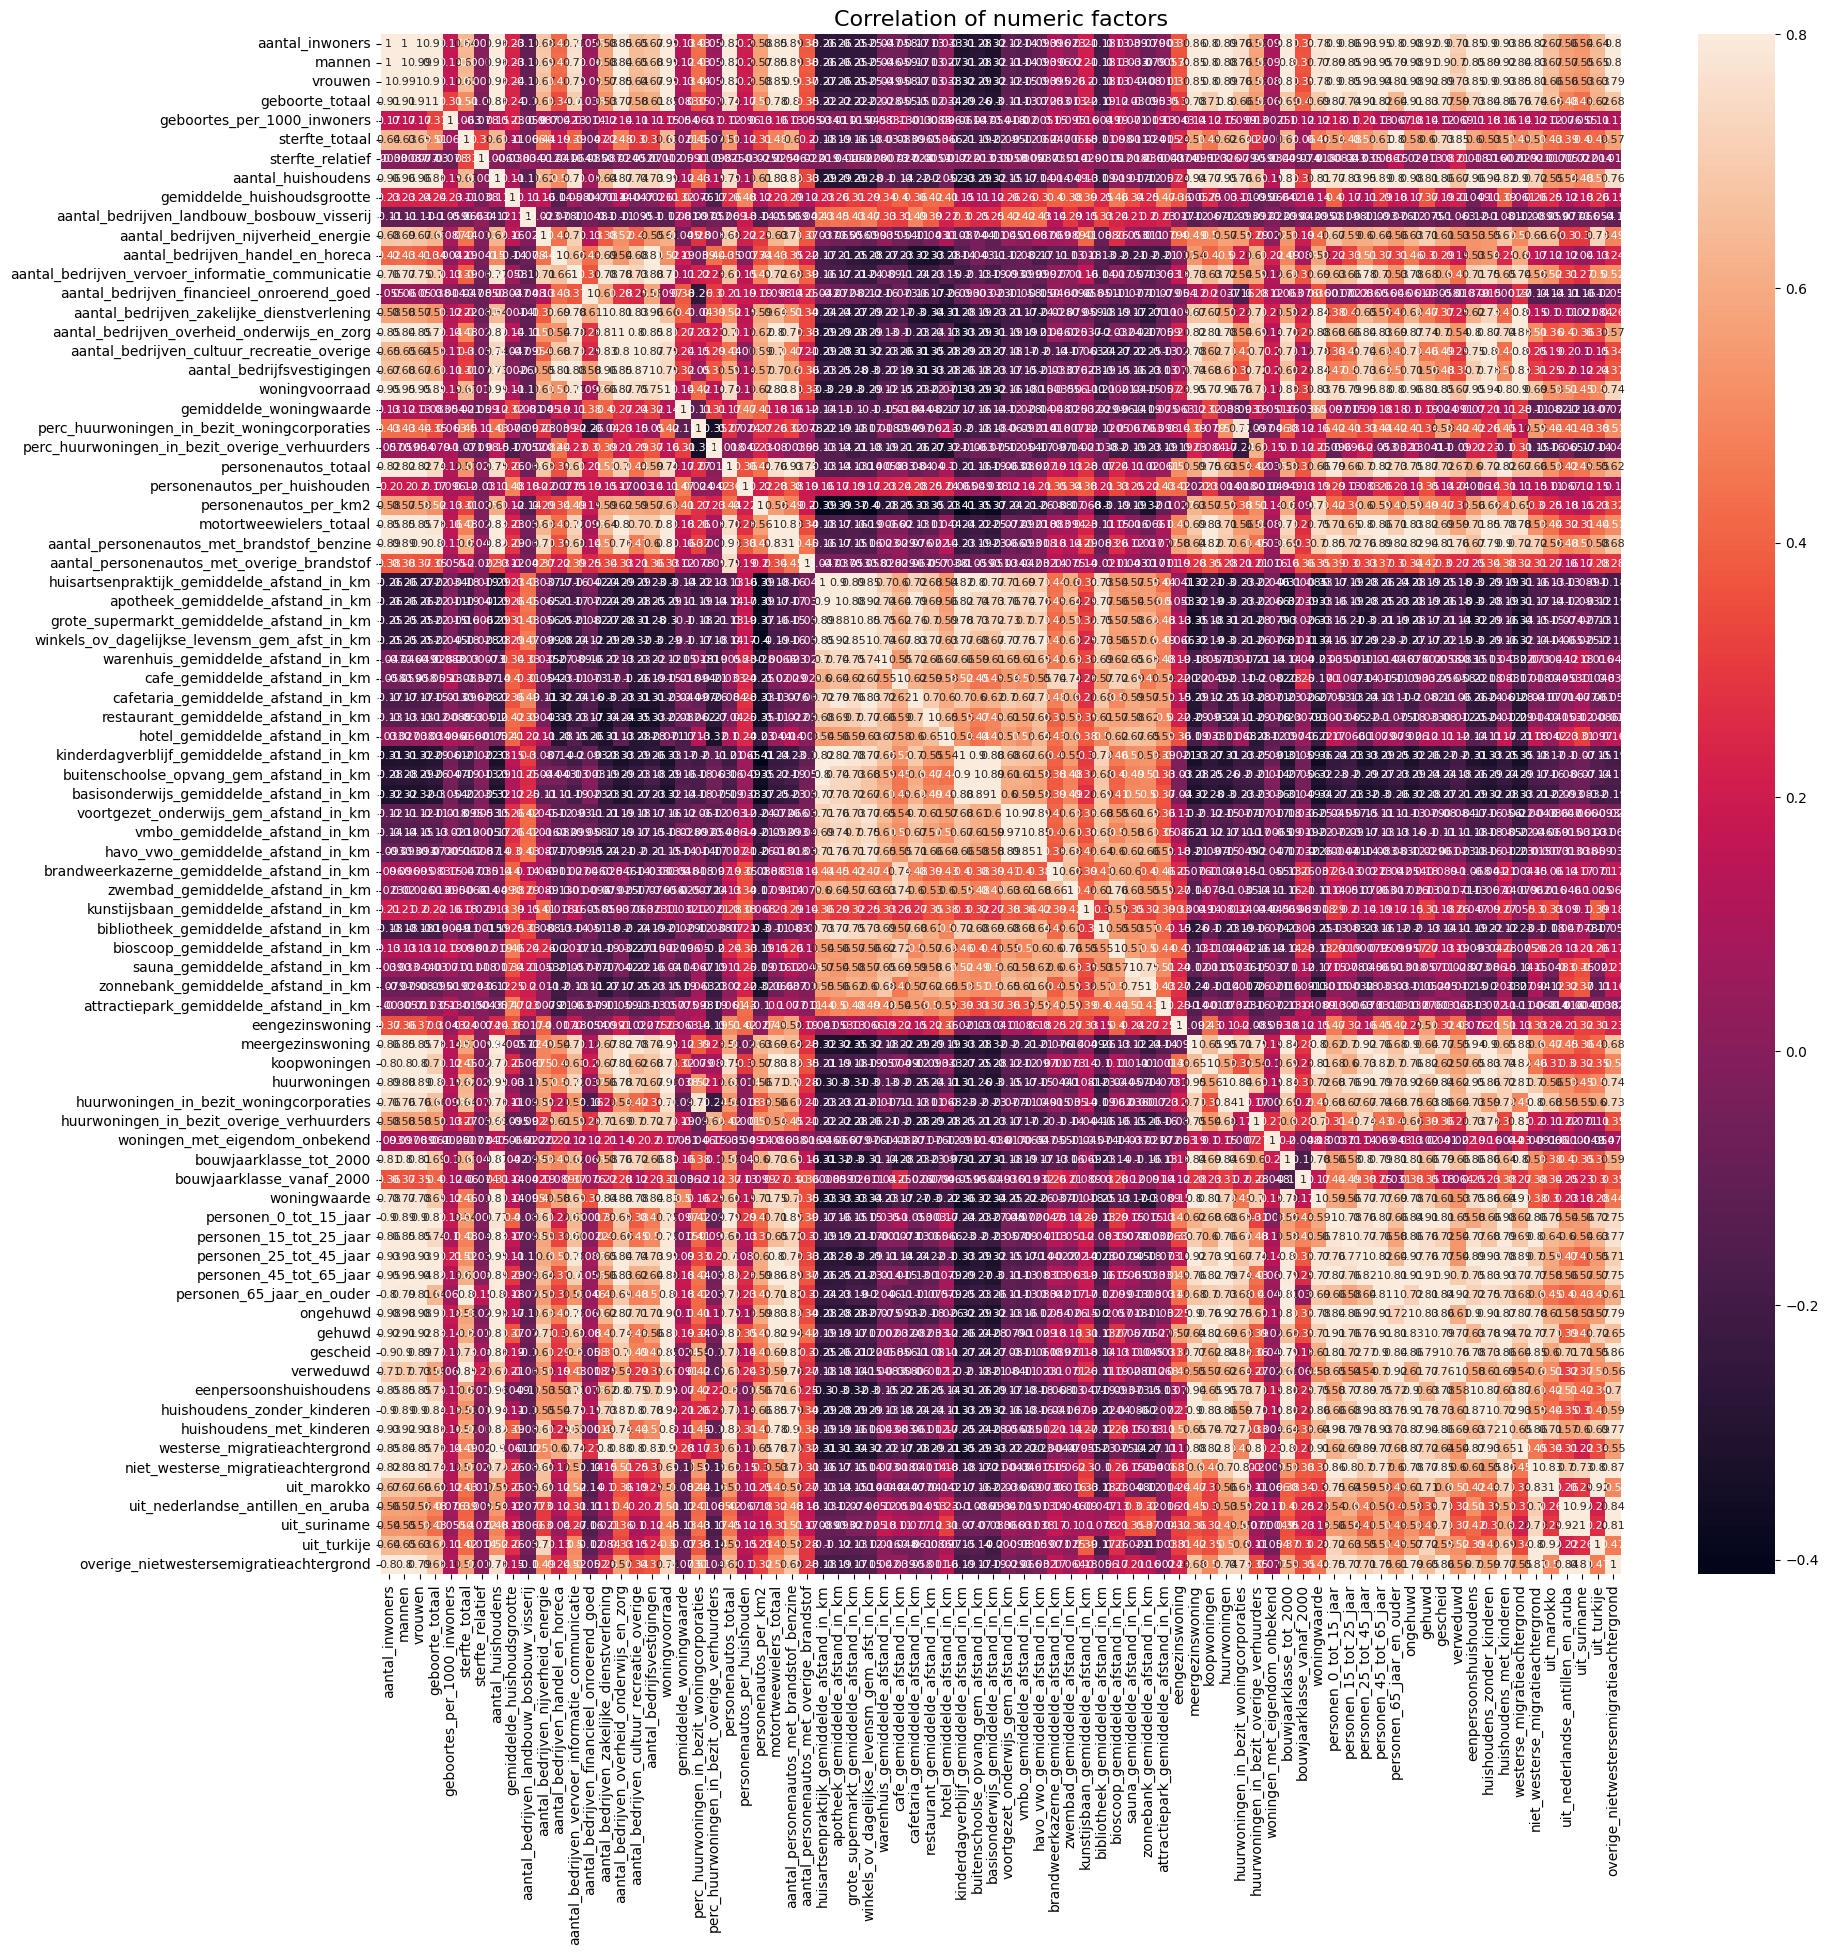

In [6]:
corr_matrix = numeric_data.corr()
f, ax = plt.subplots(figsize = (20,20))
plt.title('Correlation of numeric factors', y = 1, size = 16)
sns.heatmap(corr_matrix, vmax = .8, annot_kws={'size': 8}, annot = True)

In [7]:
def print_highly_correlated(df, features, threshold_down=0.7, threshold_up=1.0):
    """Prints highly correlated features pairs in the data frame (helpful for feature engineering)"""
    corr_df = df[features].corr()
    correlated_features = np.where((np.abs(corr_df) < threshold_up) & (np.abs(corr_df) > threshold_down)) # select ones above the abs threshold
    correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
    s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value
    if s_corr_list == []:
        print("There are no highly correlated features with correlation above", threshold_down)
    else:
        for v, i, j in s_corr_list:
            cols = df[features].columns
            print ("%s and %s = %.3f" % (corr_df.index[i], corr_df.columns[j], v))

In [8]:
columns = [ column for column in numeric_data.columns if "_binnen_" not in column ]
columns = [ column for column in columns if column not in ['aantal_inwoners', 'vrouwen', 'mannen', 'woningvoorraad'] ]
print_highly_correlated(numeric_data, columns)

personen_0_tot_15_jaar and huishoudens_met_kinderen = 0.976
aantal_huishoudens and ongehuwd = 0.976
voortgezet_onderwijs_gem_afstand_in_km and vmbo_gemiddelde_afstand_in_km = 0.970
personen_25_tot_45_jaar and ongehuwd = 0.970
aantal_bedrijven_zakelijke_dienstverlening and aantal_bedrijfsvestigingen = 0.957
aantal_huishoudens and eenpersoonshuishoudens = 0.956
aantal_huishoudens and personen_25_tot_45_jaar = 0.951
aantal_huishoudens and huurwoningen = 0.948
meergezinswoning and huurwoningen = 0.947
huurwoningen and eenpersoonshuishoudens = 0.946
gehuwd and huishoudens_met_kinderen = 0.944
meergezinswoning and eenpersoonshuishoudens = 0.943
aantal_huishoudens and huishoudens_zonder_kinderen = 0.940
aantal_huishoudens and meergezinswoning = 0.935
aantal_personenautos_met_brandstof_benzine and gehuwd = 0.935
personen_25_tot_45_jaar and huishoudens_zonder_kinderen = 0.935
personen_45_tot_65_jaar and huishoudens_met_kinderen = 0.930
personenautos_totaal and aantal_personenautos_met_brandstof